<h2><b>Nama : Victory Herawidatama Esa Putra</b></h2>
<h3><b> Email : 18101105@ittelkom-pwt.ac.id </b></h3>




**Source Code yang digunakan untuk upload file csv**

In [76]:
from google.colab import files
file = files.upload()

Saving spam.csv to spam.csv


**Import libraries yang digunakan**

In [77]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
%matplotlib inline

**Load data untuk ditampilkan dengan font latin-1**
<p><b>Menampilkan 5 data teratas</b> </p>

In [78]:
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin-1' )
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Menghapus element yang tidak dibutuhkan pada kolom csv**

In [79]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Proses plotting menggunakan diagram batang antara ham dan spam messsage**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messsage')

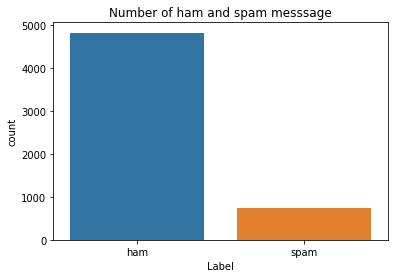

In [80]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messsage')

**Membuat parameter untuk input dan output vector untuk proses label**

In [81]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

**Split data untuk training dan test data**

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

**Proses Tokenizer dengan mengubah teks menjadi urutan & menambahkan padding**

In [83]:
max_words = 1000
max_len = 150
token = Tokenizer(num_words=max_words)
token.fit_on_texts(X_train)
sequences = token.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

**Proses Modelling data menggunakan models Sequential dengan Embedding dan LSTM pada arsitektur model**

In [84]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words, 50, input_length=max_len))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

**Menampilkan model yang telah terbentuk berdasarkan parameter yang sudah ditentukan sebelumnya**

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 81,553
Trainable params: 81,553
Non-trainable params: 0
_________________________________________________________________


**Pendefinisian fungsi callbacks yang membatasi test model ketika mencapai akurasi tertentu**

In [86]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

**Proses Training menggunakan model fit dengan epochs 20 menggunakan fungsi callbacks**

In [87]:
test = model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,
          validation_split=0.2)
#Callbacks tidak digunakan karena rata - rata setiap pengujian log mencapai akurasi diatas 75%

Epoch 1/20
28/28 [==============================] - 8s 212ms/step - loss: 0.4678 - accuracy: 0.8592 - val_loss: 0.3150 - val_accuracy: 0.8666
Epoch 2/20
28/28 [==============================] - 5s 194ms/step - loss: 0.2048 - accuracy: 0.9203 - val_loss: 0.1240 - val_accuracy: 0.9686
Epoch 3/20
28/28 [==============================] - 5s 193ms/step - loss: 0.0757 - accuracy: 0.9815 - val_loss: 0.0590 - val_accuracy: 0.9854
Epoch 4/20
28/28 [==============================] - 5s 193ms/step - loss: 0.0384 - accuracy: 0.9899 - val_loss: 0.0566 - val_accuracy: 0.9888
Epoch 5/20
28/28 [==============================] - 5s 193ms/step - loss: 0.0281 - accuracy: 0.9919 - val_loss: 0.0599 - val_accuracy: 0.9877
Epoch 6/20
28/28 [==============================] - 5s 193ms/step - loss: 0.0190 - accuracy: 0.9947 - val_loss: 0.0673 - val_accuracy: 0.9843
Epoch 7/20
28/28 [==============================] - 5s 194ms/step - loss: 0.0136 - accuracy: 0.9966 - val_loss: 0.0715 - val_accuracy: 0.9854
Epoch 

In [88]:
test_sequences = token.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)

In [90]:
accur = model.evaluate(test_sequences_matrix, Y_test)

35/35 [==============================] - 1s 21ms/step - loss: 0.0481 - accuracy: 0.9865


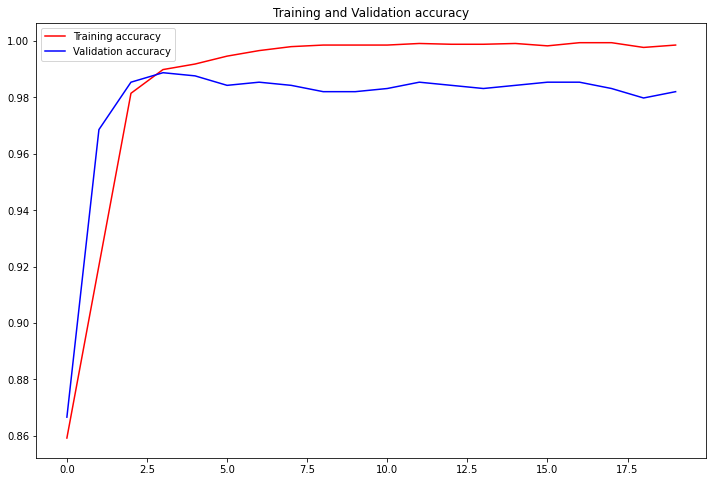

In [91]:
accur = test.history['accuracy']
val_accur = test.history['val_accuracy']
loss = test.history['loss']
val_loss = test.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize = (12, 8))
plt.plot(epochs, accur, 'r', label = 'Training accuracy')
plt.plot(epochs, val_accur, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 0)
plt.show()